**OENotebook** is a small python package that provides some tools to make using [OE Toolkits](http://docs.eyesopen.com/toolkits/python/) easier in [IPython](http://ipython.org/) and the [Jupyter Notebook](https://jupyter.org/).

In [1]:
import oenotebook as oenb
from openeye import oechem

# do we have a license?
print(oechem.OEChemIsLicensed())

True


**OENotebook** can tell you where to find more detailed documentation, either from the local install or online.

In [2]:
oenb.doc_link()


### [OENotbook Documentation](http://beta-docs.eyesopen.com/toolkits/oenotebook/)

If you don't have web access you can open the local copy of the documentation by pasting
the following URL into the address bar of your browser.

**``file:///Users/mattg/miniconda2/envs/oe3/lib/python3.5/site-packages/oenotebook/docs/index.html``**


### Error Capturing

One basic feature that **OENotebook** provides is displaying OE Errors within the notebook.

In [3]:
mol = oechem.OEMol()
smi = "!! I am not a valid SMILES string!!"

# Watch out!
oechem.OESmilesToMol(mol, smi)

print(mol.NumAtoms())    


0


In [4]:
mol = oechem.OEMol()
smi = "C1CCCN[C@@H]1(O)"

# Parse our smiles into a molecule
oechem.OESmilesToMol(mol, smi)

print(mol.NumAtoms())
mol

8


OEMol: **``C1CCN[C@@H](C1)O``**  

Note the intelligent rendering of the OEMol object with the SMILES string above. This automated representation can be adjusted or disabled.

In [5]:
oenb.disable_markdown_mols()

In [6]:
mol

<'oechem.OEMol'  C1CCN[C@@H](C1)O >

In [7]:
oenb.disable_text_mols()
mol

<oechem.OEMol; proxy of <Swig Object of type 'OEMolWrapper *' at 0x111617b10> >

In [8]:
oenb.enable_markdown_mols()
mol

OEMol: **``C1CCN[C@@H](C1)O``**  

### Reading Molecule files into DataFrames

**OENotebook** leverages the [pandas](http://pandas.pydata.org/) library to read molecules to DataFrames and write DataFrames back to molecule files. This provides a handy data structure for working with groups of molecules and attached data. Any SD data is automatically populated into the data frame, and is saved when written.

In [9]:
ml = oenb.read_file_to_dataframe("er_actives.ism")
ml.head()

,Molecule
0,<oechem.OEMol; proxy of <Swig Object of type '...
1,<oechem.OEMol; proxy of <Swig Object of type '...
2,<oechem.OEMol; proxy of <Swig Object of type '...
3,<oechem.OEMol; proxy of <Swig Object of type '...
4,<oechem.OEMol; proxy of <Swig Object of type '...


** Use OETK Functions to add a new Column**

In [10]:
ml['MW'] = ml.Molecule.apply(oechem.OECalculateMolecularWeight)
ml['NumAtoms'] = ml.Molecule.apply(lambda x: x.NumAtoms())
ml.head()

,Molecule,MW,NumAtoms
0,<oechem.OEMol; proxy of <Swig Object of type '...,388.52190,29
1,<oechem.OEMol; proxy of <Swig Object of type '...,406.96756,29
2,<oechem.OEMol; proxy of <Swig Object of type '...,372.52250,28
3,<oechem.OEMol; proxy of <Swig Object of type '...,406.96756,29
4,<oechem.OEMol; proxy of <Swig Object of type '...,454.57998,34


**Summary Statistsics**

In [11]:
ml.describe()

,MW,NumAtoms
count,40.000000,40.000000
mean,425.924159,31.725000
std,41.479300,3.029661
min,347.473280,26.000000
25%,395.022490,29.000000
50%,424.060850,31.500000
75%,459.603935,34.000000
max,508.650500,37.000000


**Sort on a Column**

In [12]:
ml.sort_values(by="MW").head()


,Molecule,MW,NumAtoms
33,<oechem.OEMol; proxy of <Swig Object of type '...,347.47328,26
31,<oechem.OEMol; proxy of <Swig Object of type '...,347.47328,26
28,<oechem.OEMol; proxy of <Swig Object of type '...,361.49986,27
2,<oechem.OEMol; proxy of <Swig Object of type '...,372.52250,28
30,<oechem.OEMol; proxy of <Swig Object of type '...,381.48950,29


In [13]:
# Reversed sorting
ml.sort_values(by="MW",ascending=False).head()

,Molecule,MW,NumAtoms
5,<oechem.OEMol; proxy of <Swig Object of type '...,508.65050,37
17,<oechem.OEMol; proxy of <Swig Object of type '...,502.64438,36
10,<oechem.OEMol; proxy of <Swig Object of type '...,474.59122,34
16,<oechem.OEMol; proxy of <Swig Object of type '...,474.59122,34
21,<oechem.OEMol; proxy of <Swig Object of type '...,474.59122,35


**Conditional Filtering based on Column Value**

In [14]:
ml[ml.MW < 400].describe()

,MW,NumAtoms
count,15.000000,15.000000
mean,382.910143,28.733333
std,17.469586,1.387015
min,347.473280,26.000000
25%,377.006000,28.500000
50%,388.521900,29.000000
75%,395.516080,30.000000
max,396.504140,30.000000


**Output to Molecule Format or CSV with SMILES**

In [15]:
oenb.write_dataframe_to_file(ml[ml.MW < 400], "mw_lt400.oeb")

In [16]:
%ls -lh mw_lt400.oeb

-rw-r--r--  1 mattg  staff   7.9K Sep 20 13:03 mw_lt400.oeb


In [17]:
oenb.write_dataframe_to_file(ml[ml.MW < 600], "mw_lt400.csv")

In [18]:
%%sh
head mw_lt400.csv

SMILES,TITLE,MW,NumAtoms
CC/C(=C(/c1ccc(cc1)O)\c2ccc(cc2)OCC[NH+](C)C)/c3ccccc3,ZINC01530090,388.5219,29
CC[NH+](CC)CCOc1ccc(cc1)/C(=C(/c2ccccc2)\Cl)/c3ccccc3,ZINC01530602,406.96756,29
CC/C(=C(/c1ccccc1)\c2ccc(cc2)OCC[NH+](C)C)/c3ccccc3,ZINC01530690,372.5225,28
C[NH+](C)CCOc1ccc(cc1)/C(=C(/CCCl)\c2ccccc2)/c3ccccc3,ZINC01531019,406.96756,29
c1cc(ccc1Cc2c3ccc(cc3ccc2c4ccc(cc4)O)O)OCC[NH+]5CCCCC5,ZINC01543842,454.57998,34
c1ccc2cc(ccc2c1)c3c(c4ccc(cc4s3)O)C(=O)c5ccc(cc5)OCC[NH+]6CCCCC6,ZINC01545572,508.6505,37
CC/C(=C(/c1ccc(cc1)OCC[NH+](C)C)\c2cccc(c2)O)/c3ccccc3,ZINC01585847,388.5219,29
CC1([C@H]([C@H](c2ccc(cc2O1)OC)c3ccc(cc3)OCC[NH+]4CCCC4)c5ccccc5)C,ZINC01730387,458.61174,36
Cc1c2cc(ccc2n(c1c3ccc(cc3)O)CCCCCC[NH+]4CCCC4)O,ZINC01914469,393.54172,29


## Easy Depiction

**OENotebook** also has several helper depiction functions to generate depiction images, generate HTML image tags of depictions, or automatically depict any molecule in the notebook.

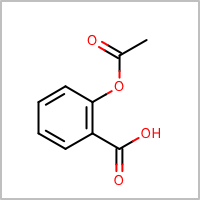

In [17]:
mol = oechem.OEMol()
oechem.OESmilesToMol(mol,"CC(=O)Oc1ccccc1C(=O)O")
oenb.draw_mol(mol)

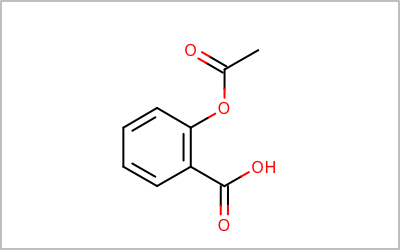

In [18]:
from IPython.display import Image
Image(oenb.draw_mol_to_png(mol))

<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAZAAAAD6CAYAAACPpxFEAAAA



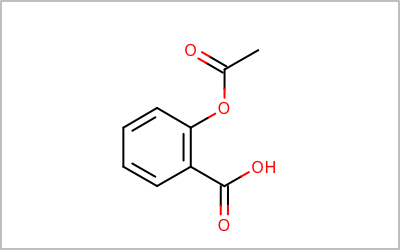

In [19]:
tag = oenb.draw_mol_to_img_tag(mol)
print(tag[:80])
from IPython.display import HTML
HTML(tag)

**Depiction of Molecules in DataFrame or in Grid**

,Molecule,MW,NumAtoms
0,,388.52190,29
1,,406.96756,29
2,,372.52250,28
3,,406.96756,29
4,,454.57998,34

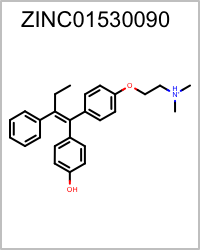
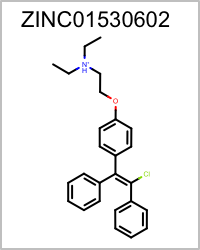
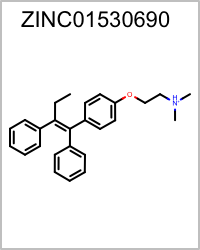
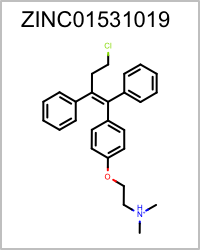
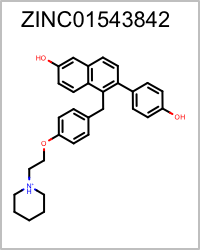

In [20]:
oenb.render_dataframe(ml.head(),width=200)

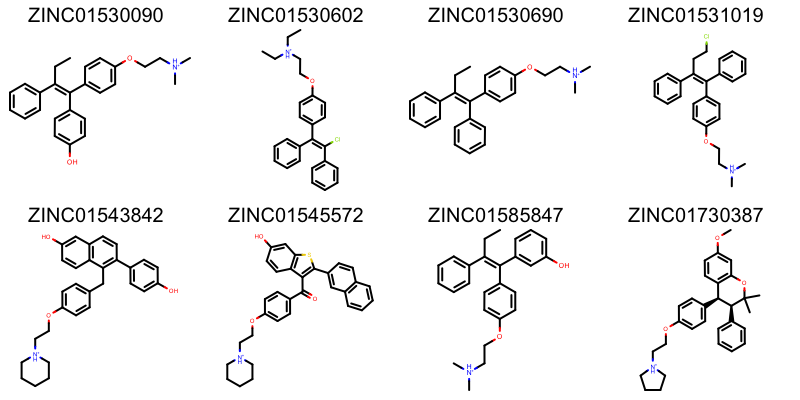

In [23]:
oenb.draw_mol_grid(ml, cols=4, rows=2)

**Automatic depiction of Molecules**

In [24]:
mol

OEMol: **``CC(=O)Oc1ccccc1C(=O)O``**  

In [25]:
oenb.enable_2D_mols()

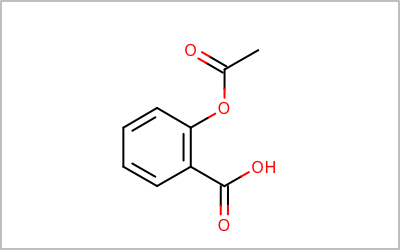

In [26]:
mol

## Plotting

There are several good plotting libraries in the Python ecosystem.  **OENotebook** has simple functions for generating scatter plots using [Bokeh](http://bokeh.pydata.org/) or [matplotlib](http://matplotlib.org/) and [mpld3](https://mpld3.github.io/).  In both of these plots, hover tooltips with 2D depictions of the molecules are generated.

In [27]:
%matplotlib inline
import warnings



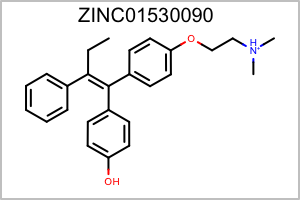
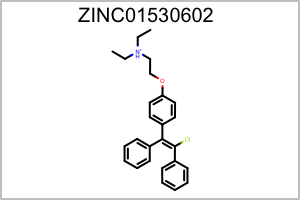
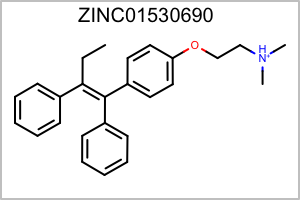
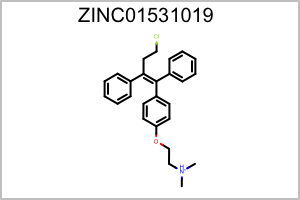
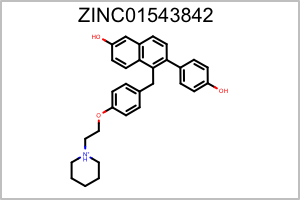
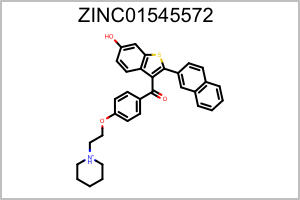
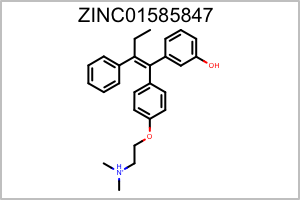
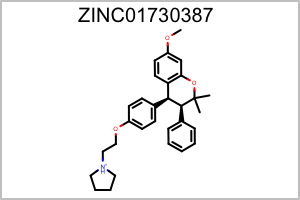
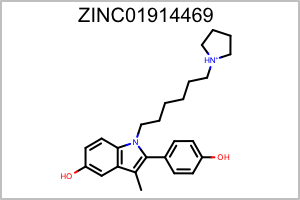
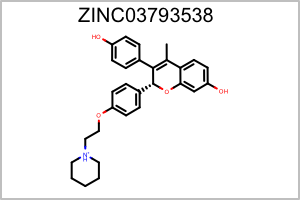
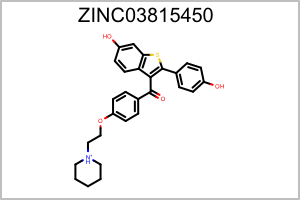
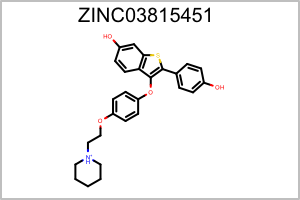
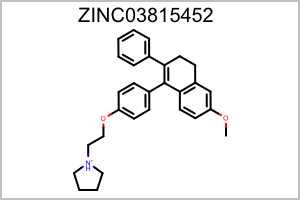
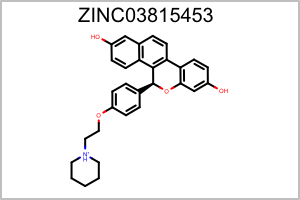
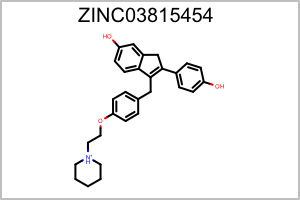
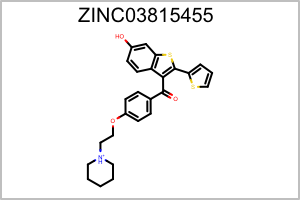
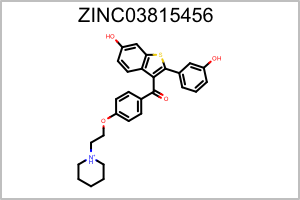
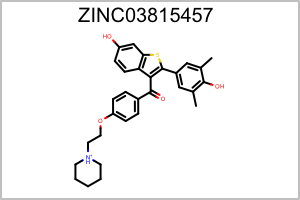
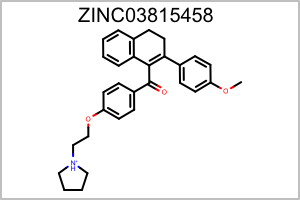
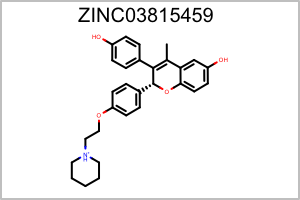
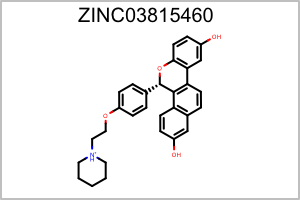
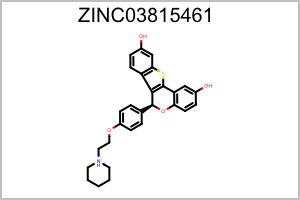
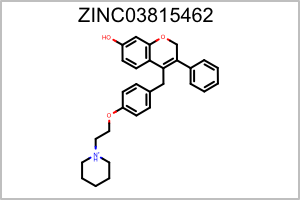
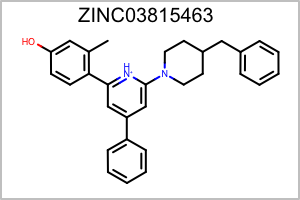
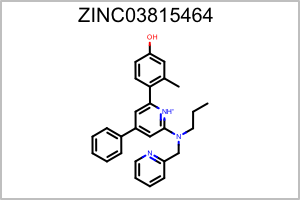
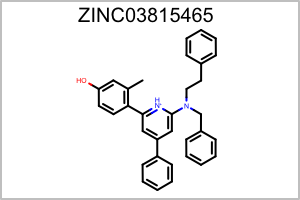
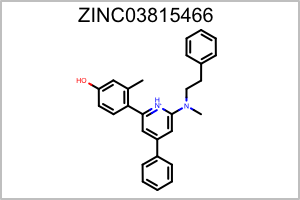
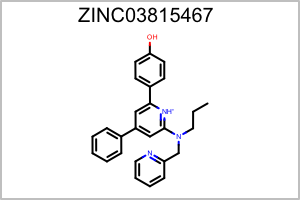
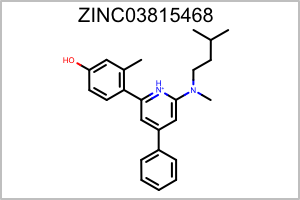
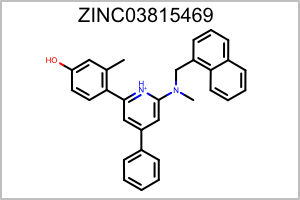
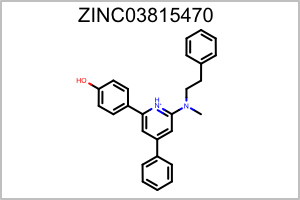
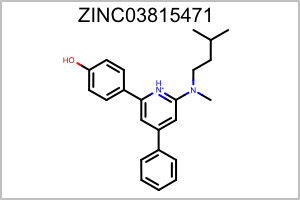
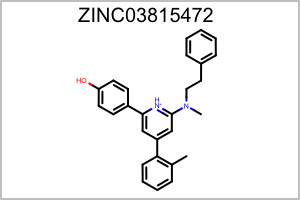
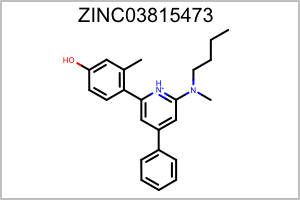
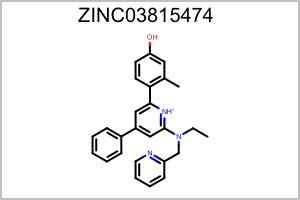
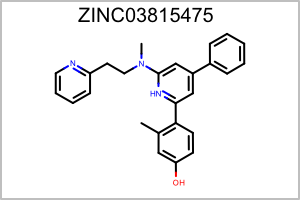
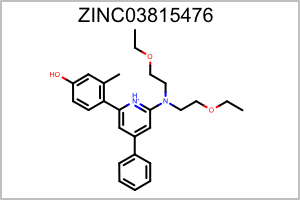
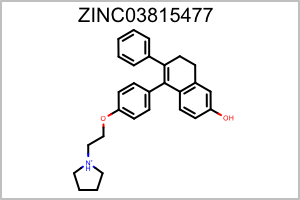
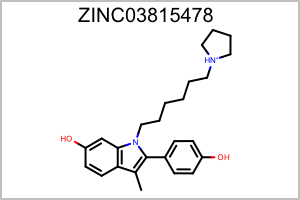
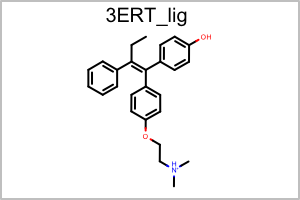
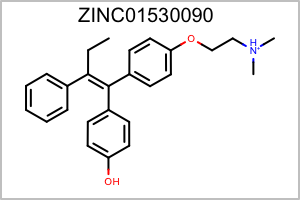
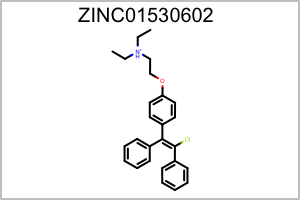
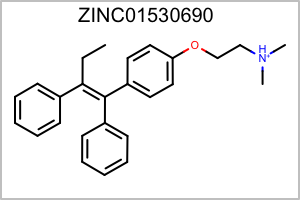
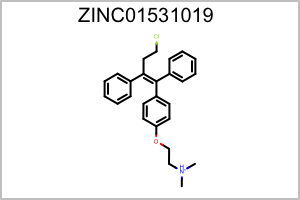
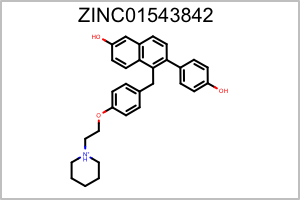
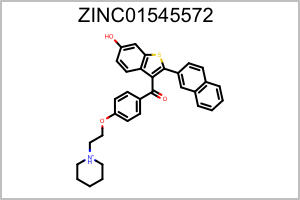
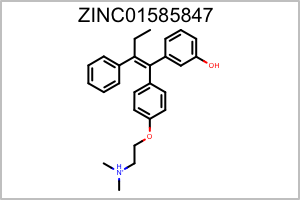
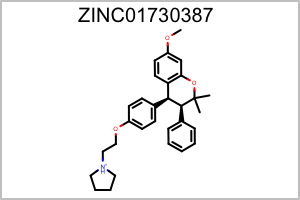
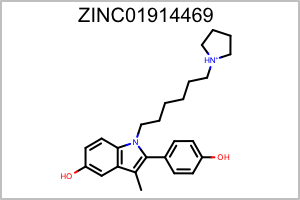
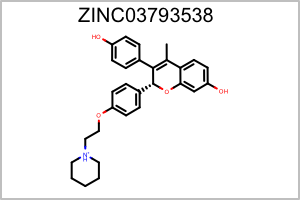
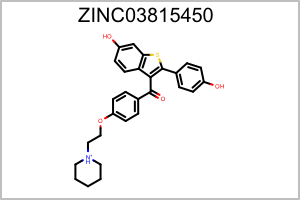
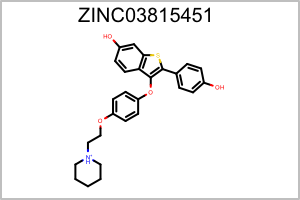
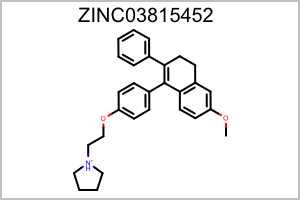
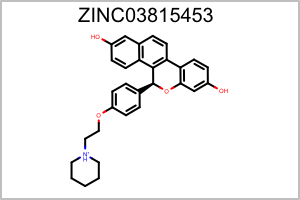
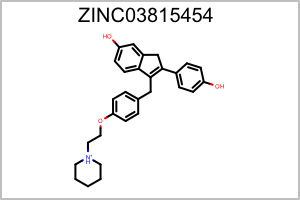
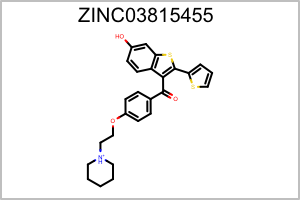
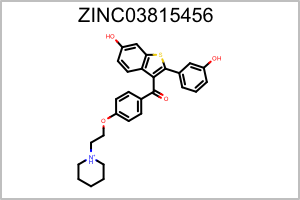
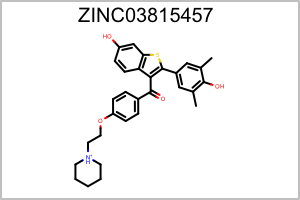
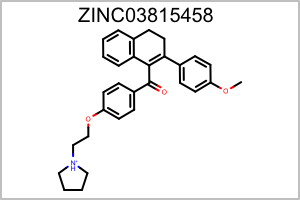
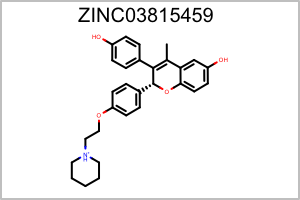
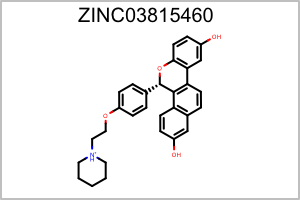
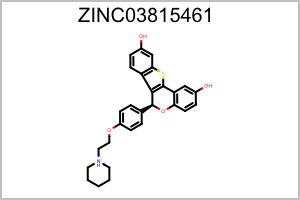
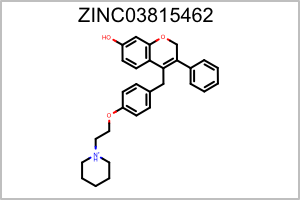
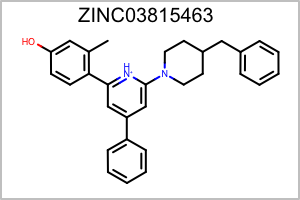
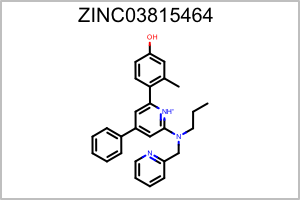
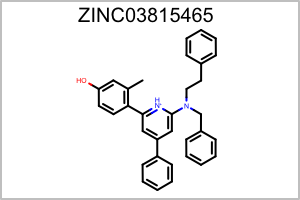
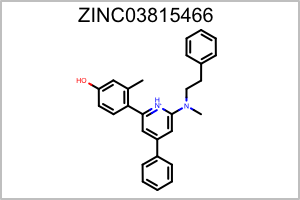
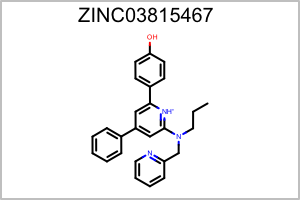
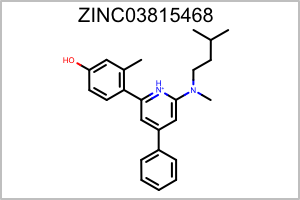
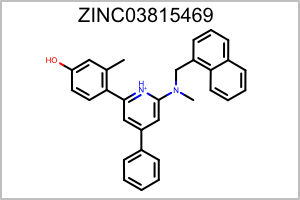
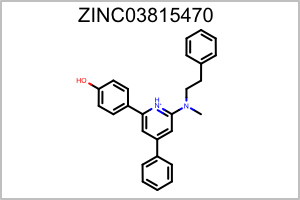
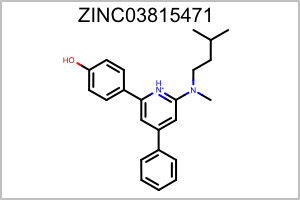
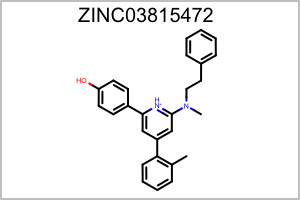
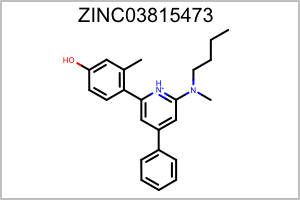
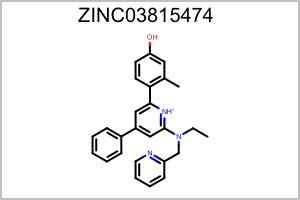
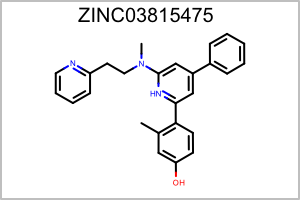
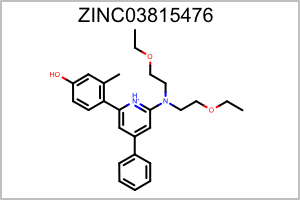
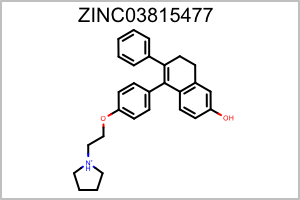
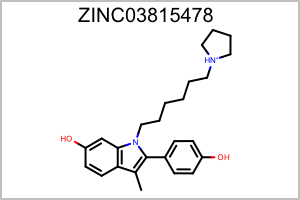
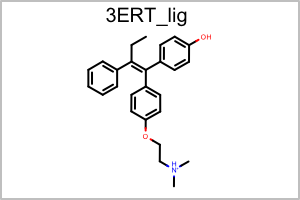
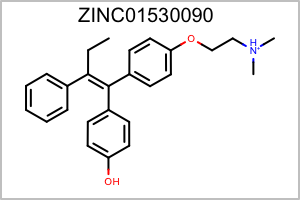
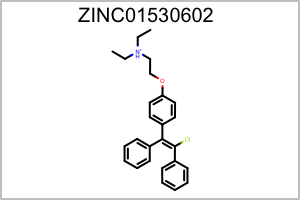
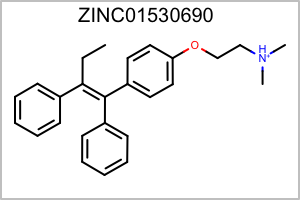
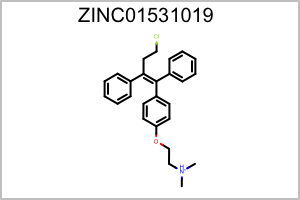
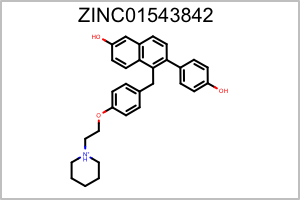
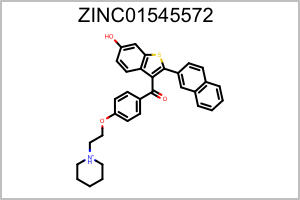
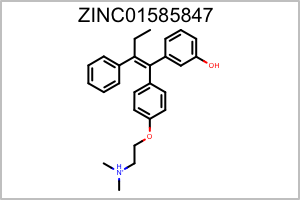
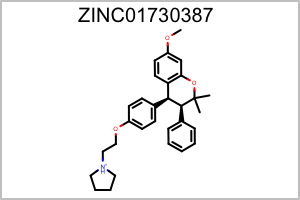
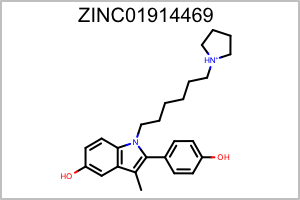
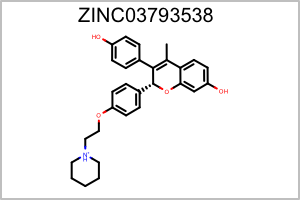
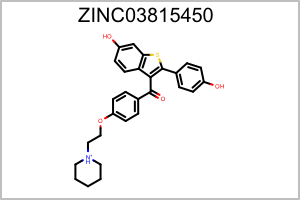
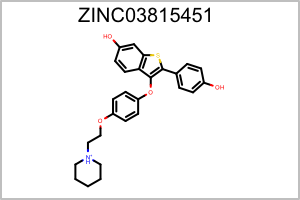
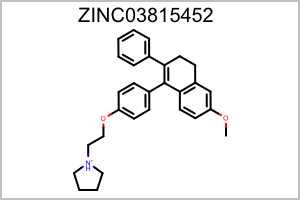
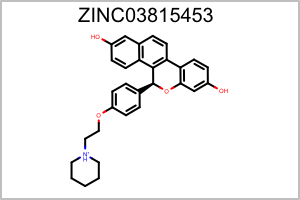
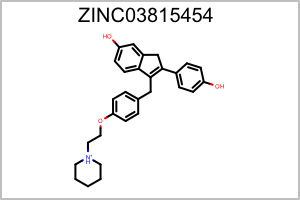
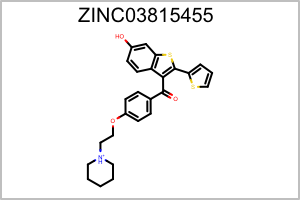
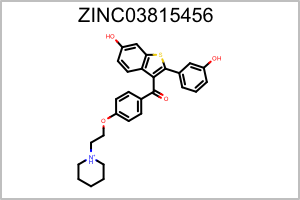
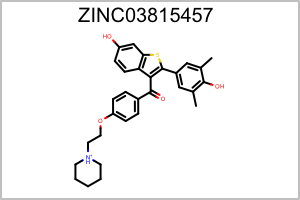
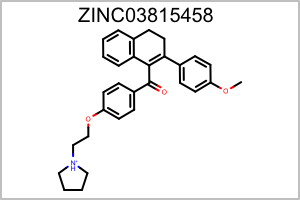
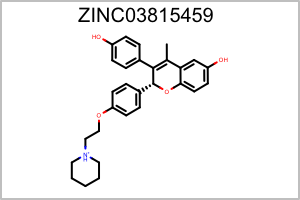
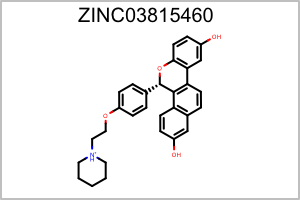
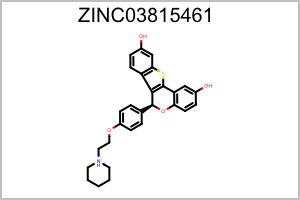
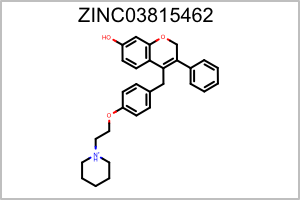
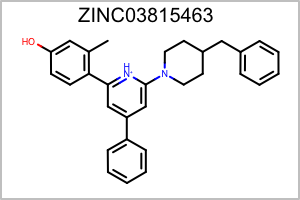
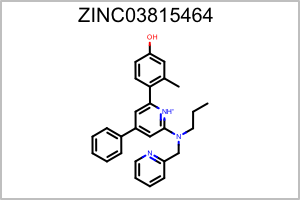
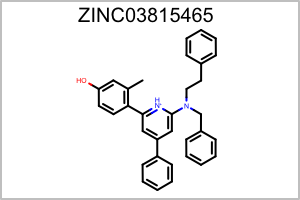
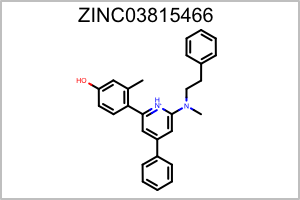
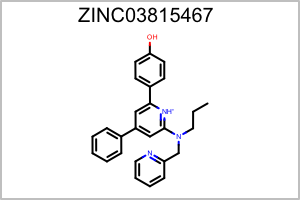
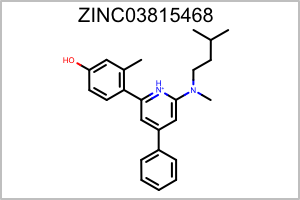
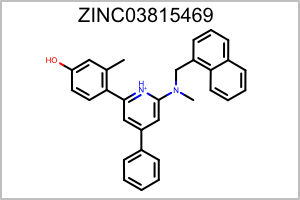
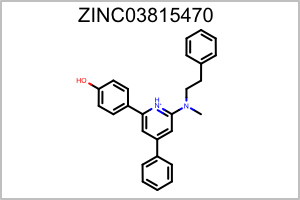
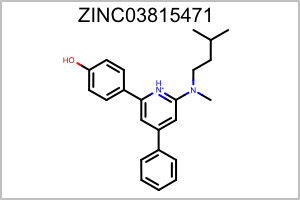
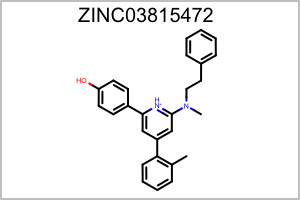
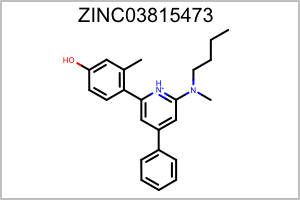
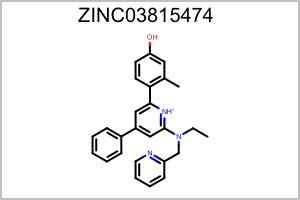
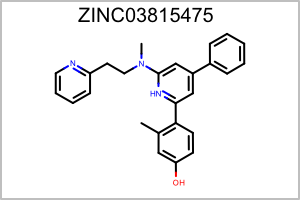
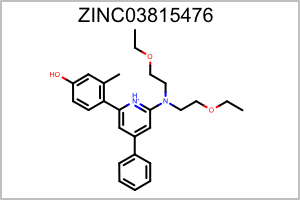
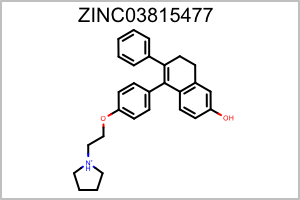
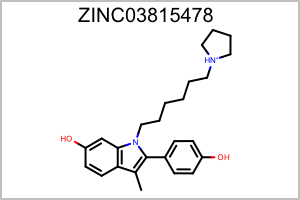
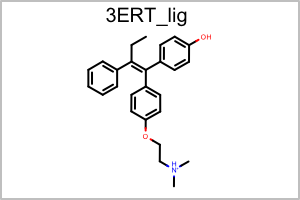

In [28]:
fig, ax = oenb.scatter_mpl(ml, "MW", "NumAtoms")

We can also generate table popups of the data.

In [29]:
fig, ax = oenb.scatter_mpl(ml, "MW", "NumAtoms", show_2D=False)

Loading BokehJS ...


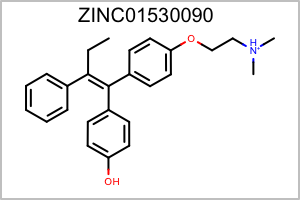
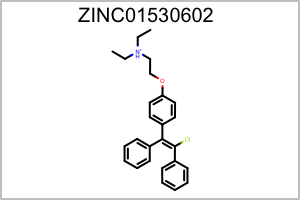
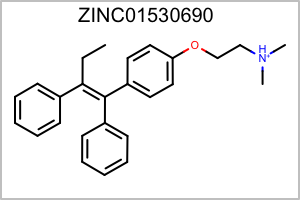
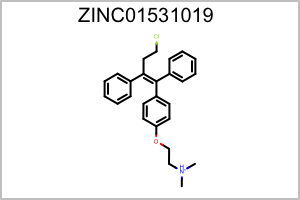
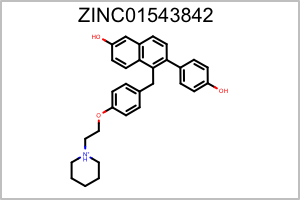
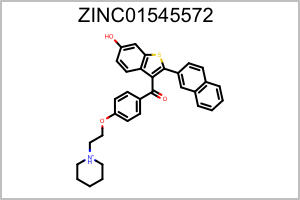
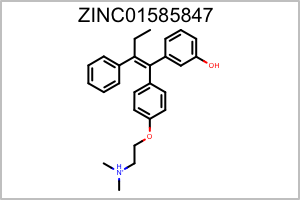
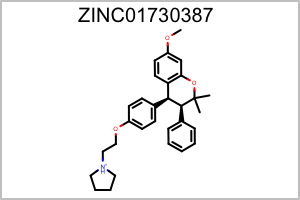
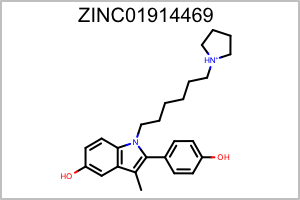
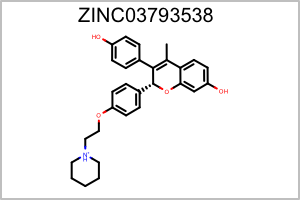
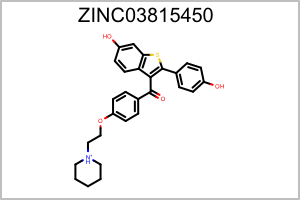
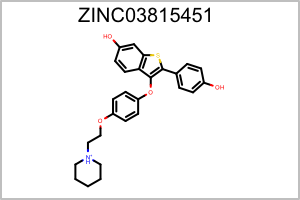
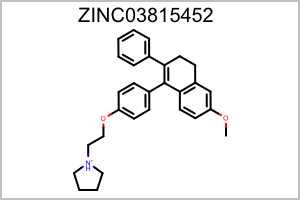
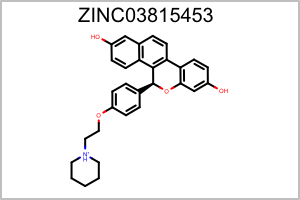
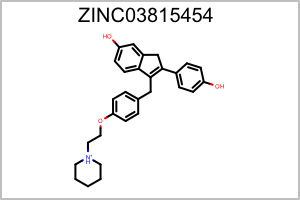
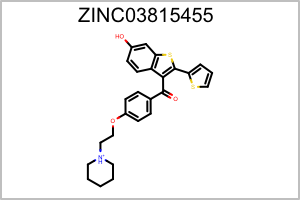
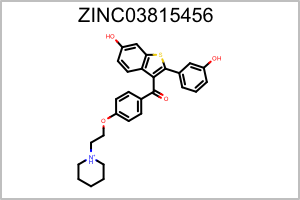
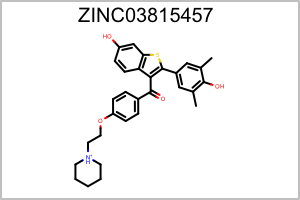
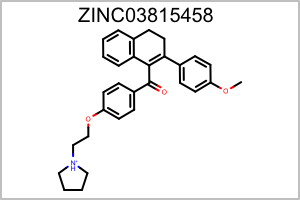
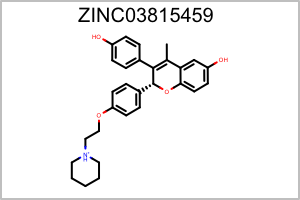
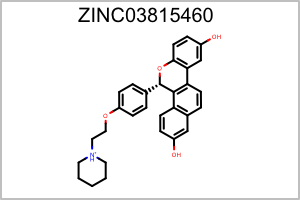
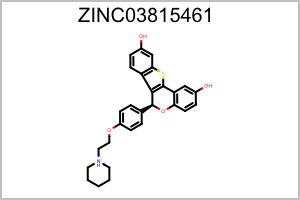
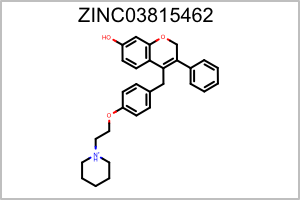
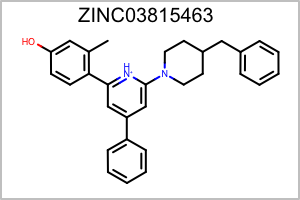
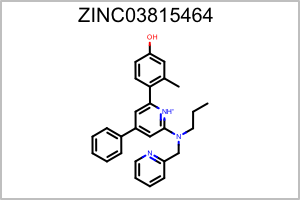
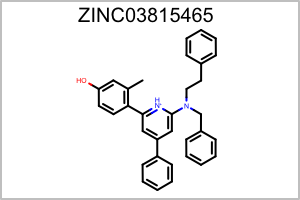
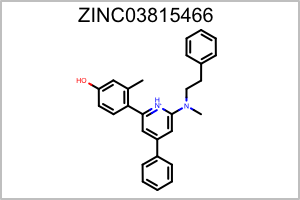
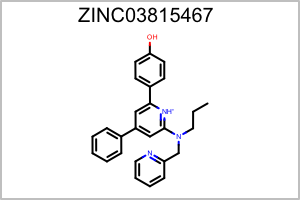
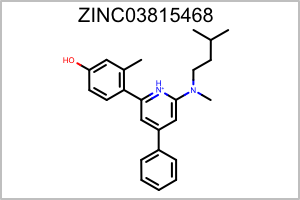
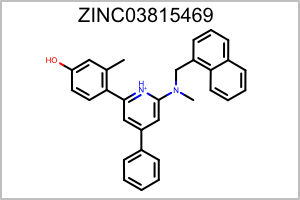
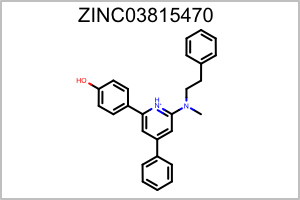
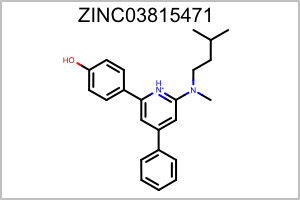
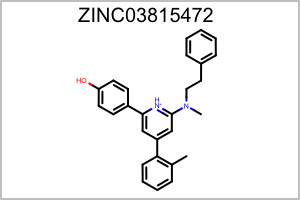
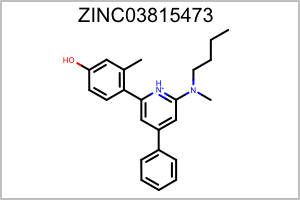
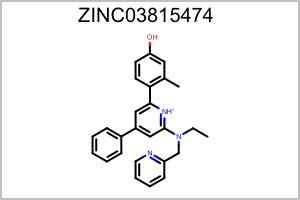
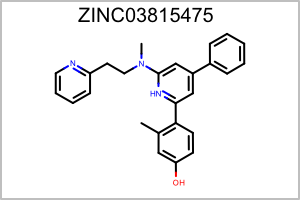
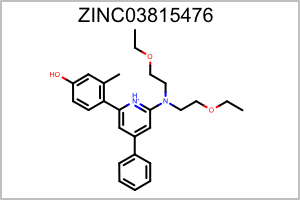
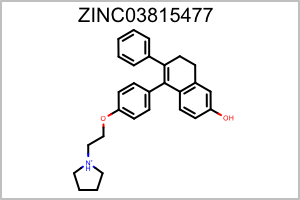
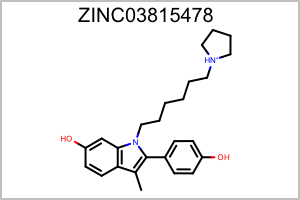
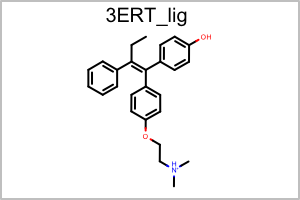

In [30]:
# with warnings.catch_warnings():
#     warnings.filterwarnings("ignore",category=DeprecationWarning)
fig = oenb.scatter_bokeh(ml, "MW", "NumAtoms")

Loading BokehJS ...


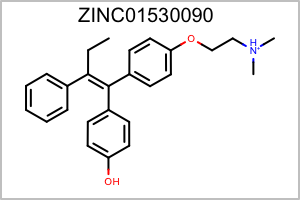
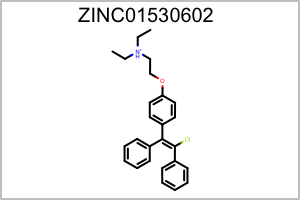
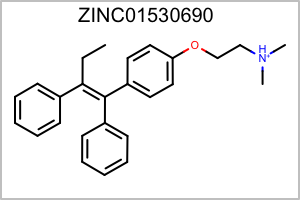
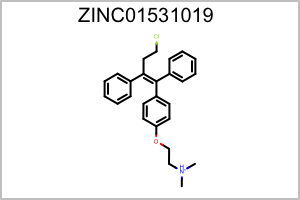
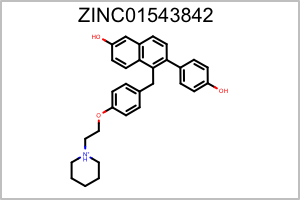
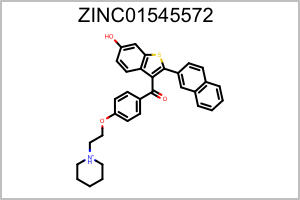
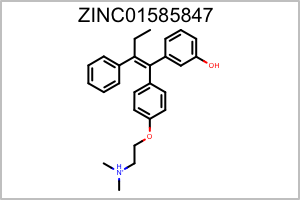
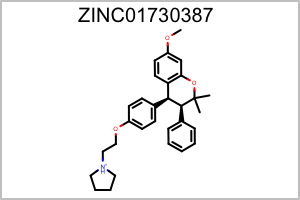
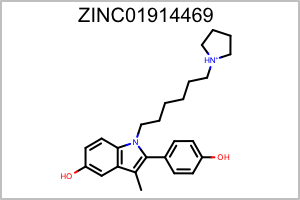
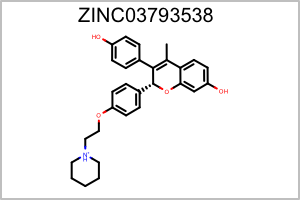
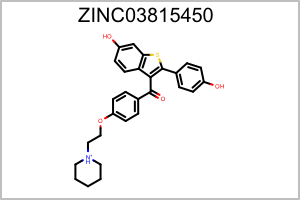
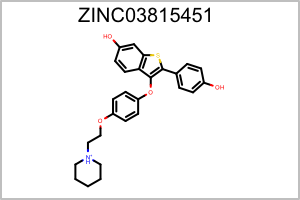
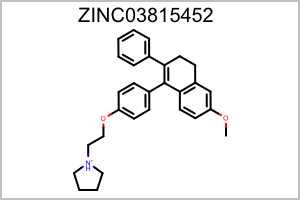
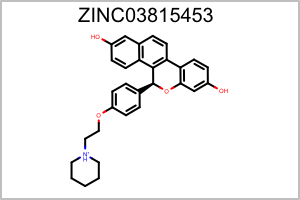
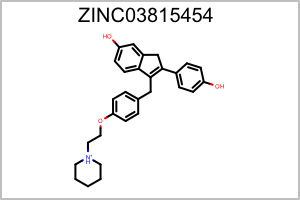
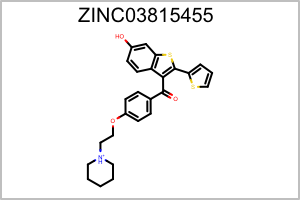
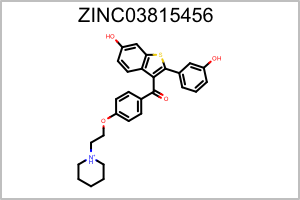
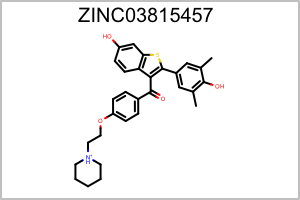
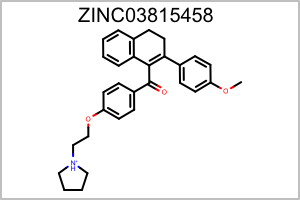
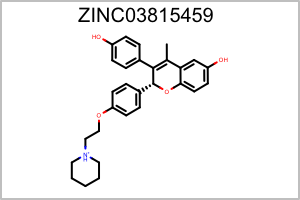
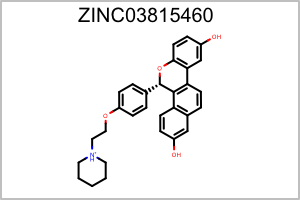
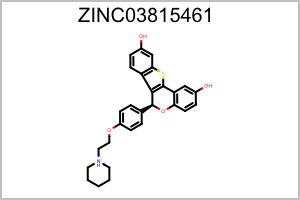
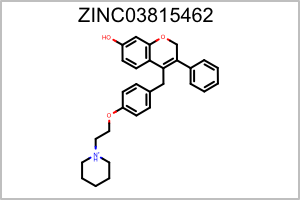
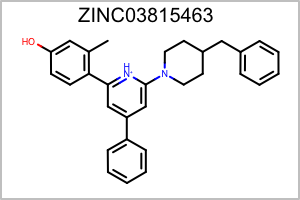
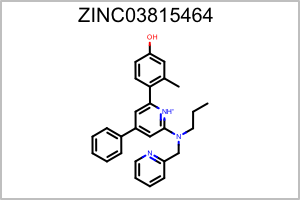
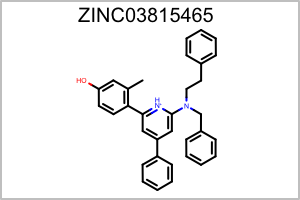
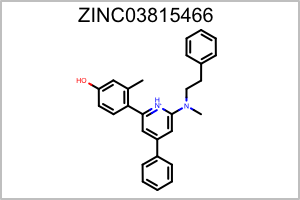
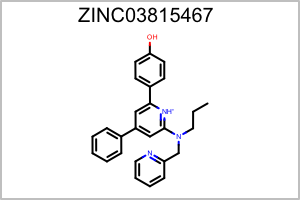
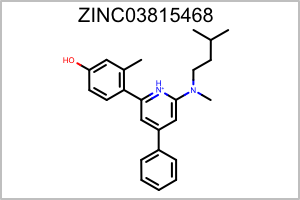
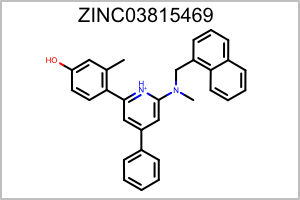
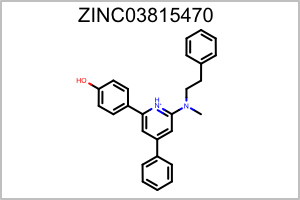
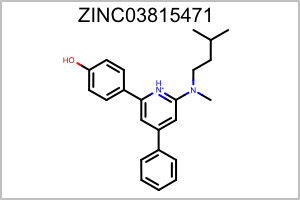
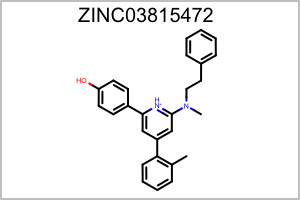
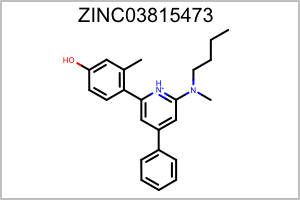
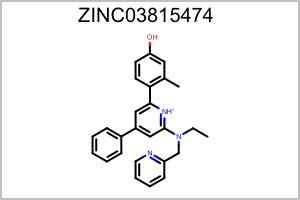
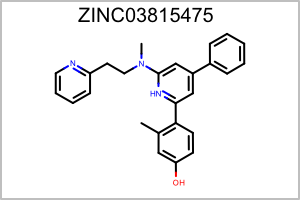
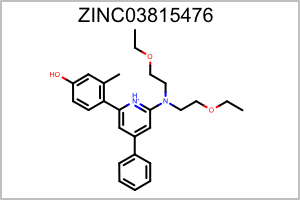
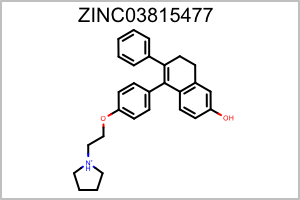
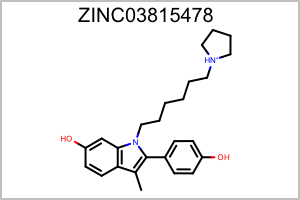
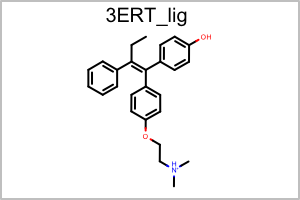
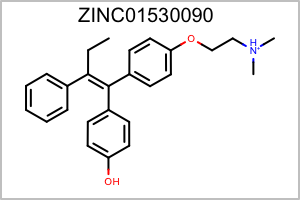
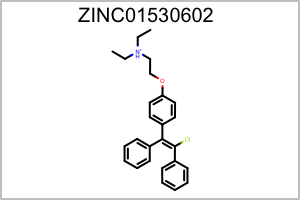
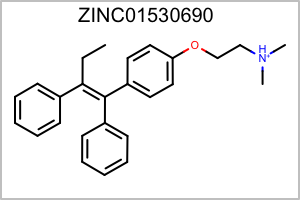
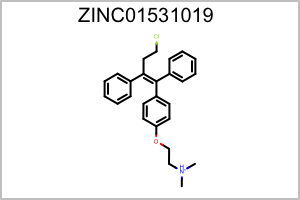
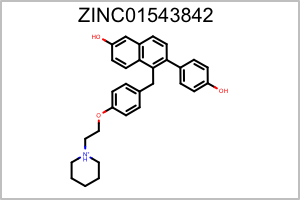
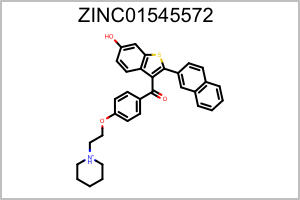
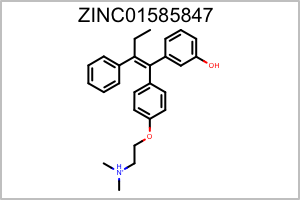
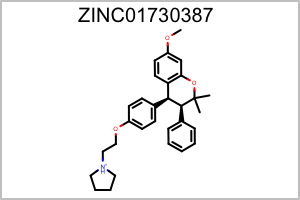
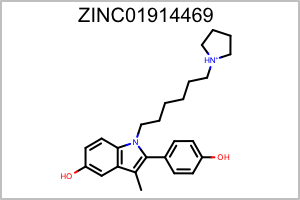
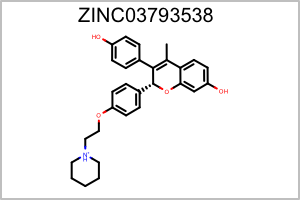
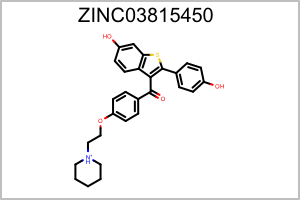
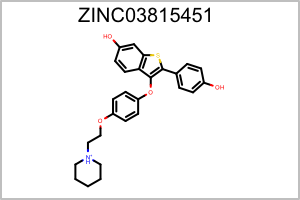
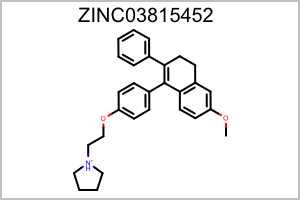
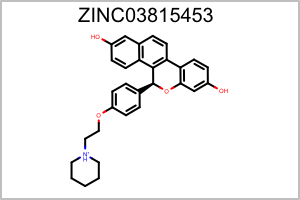
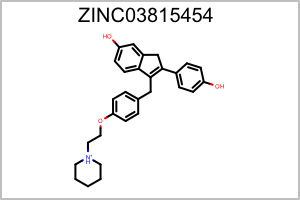
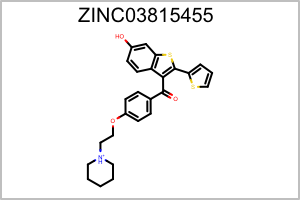
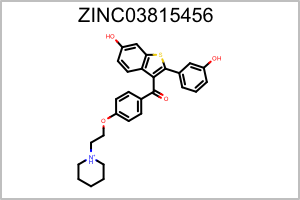
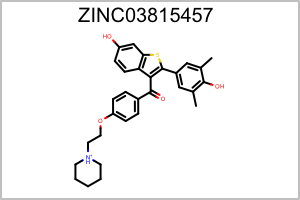
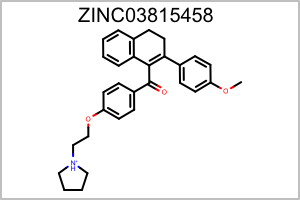
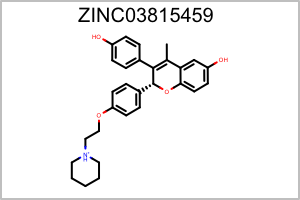
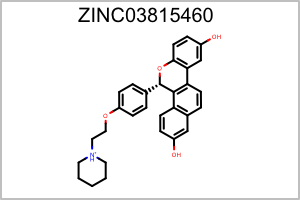
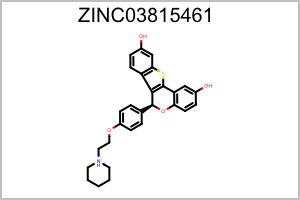
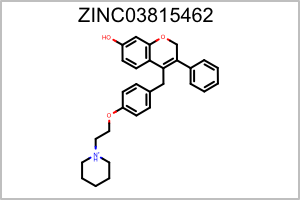
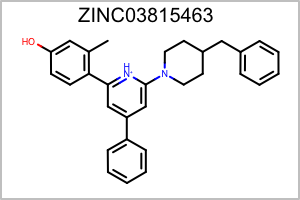
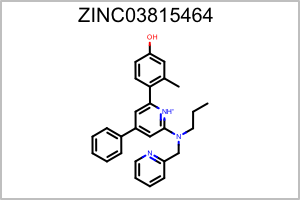
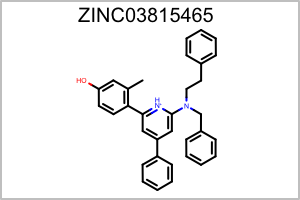
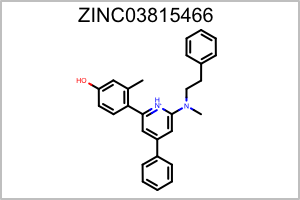
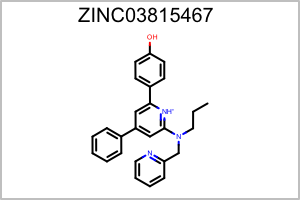
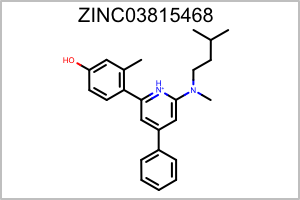
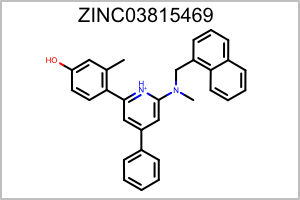
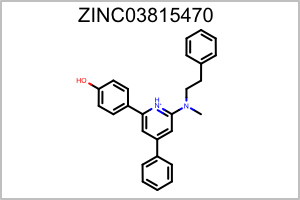
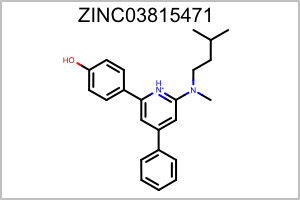
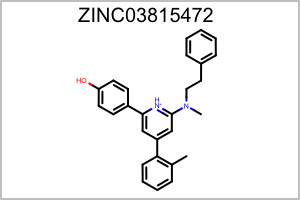
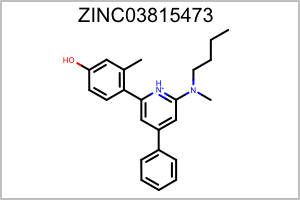
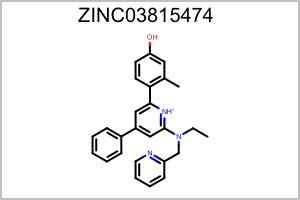
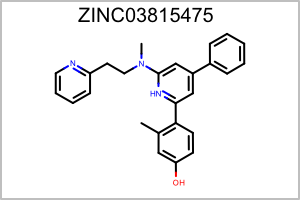
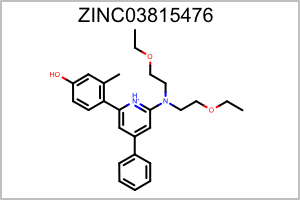
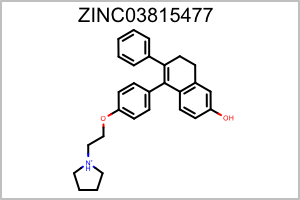
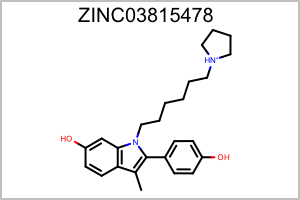
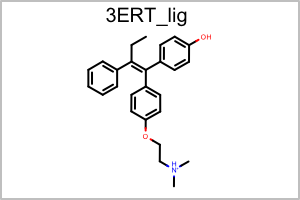

In [31]:
# with warnings.catch_warnings():
#     warnings.filterwarnings("ignore",category=DeprecationWarning)
fig = oenb.scatter_bokeh(ml, "MW", "NumAtoms", show_2D=False)